#### Exercise 1.4 (Page 8)

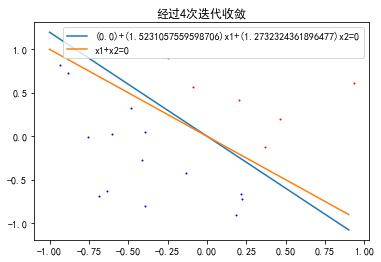

In [1]:
import helper as hlp
import numpy as np
%matplotlib inline
    
#设置随机种子，保证每次结果一致
seed = 42
rnd = np.random.RandomState(seed)
N = 20
d = 2
a, b, c, X, y, s, w = hlp.f(N, d, rnd)
hlp.plot_helper(a, b, c, X, y, s, w)

#### Exercise 1.10 (Page 23)
(b)

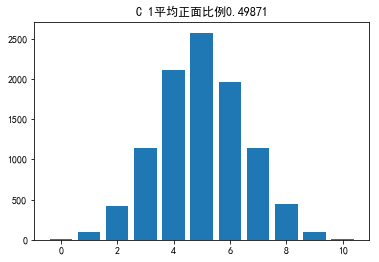

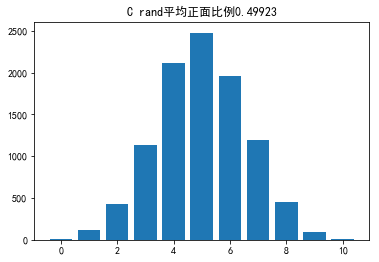

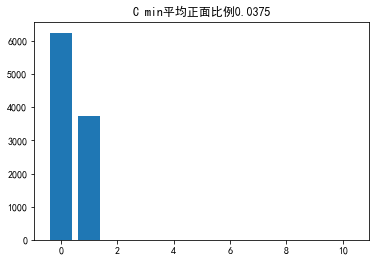

0.03764441914136553


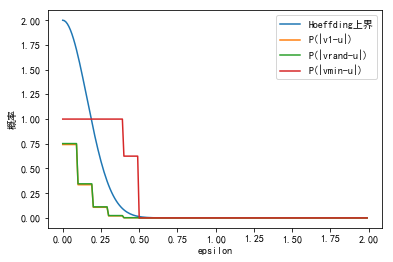

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#首先模拟一次实验的结果，n表示硬币数量，1表示正面，0表示反面，最后返回的结果为正面的数量
def simu(n):
    #n个硬币，每个硬币投10次
    X = np.random.randint(0, 2, (n, 10))
    #计算每个硬币正面的数量
    X1 = np.sum(X, axis=1)
    #第一个元素
    y1 = X1[0]
    #随机元素
    y2 = X1[np.random.randint(0, n)]
    #最小值
    y3 = np.min(X1)
    return y1, y2, y3

#记录正面硬币得分的具体情况，存入一个长度为11的列表，第i个元素表示得分为i的次数
Y1 = [0] * 11
Y2 = [0] * 11
Y3 = [0] * 11
#硬币数量
n = 1000
#实验次数
m = 10000
for i in range(m):
    y1, y2, y3 = simu(n)
    Y1[y1] += 1
    Y2[y2] += 1
    Y3[y3] += 1
    

#计算正面的次数
def total(x):
    s = 0
    for i in range(len(x)):
        s += i*x[i]
    return s
#投硬币的总次数
t = m * 10

####(b)
#作图
plt.bar(range(11),Y1)
plt.title(u'C 1平均正面比例'+str(total(Y1) / t))
plt.show()

plt.bar(range(11),Y2)
plt.title(u'C rand平均正面比例'+str(total(Y2) / t))
plt.show()

plt.bar(range(11),Y3)
plt.title(u'C min平均正面比例'+str(total(Y3) / t))
plt.show()

#数值计算结果
from scipy.special import comb

#P(v<=k),n表示一共几个硬币
def f(k, n):
    s = 0
    for i in range(k+1, 11):
        s += comb(10,i) / (2**10)
    return 1- s ** n

#P(v=k)
def g(k, n):
    return f(k, n) - f(k-1, n)

def h(n):
    s = 0
    for k in range(11):
        s += k / 10.0 * g(k, n)
    return s

print(h(1000))
#0.03764441914136553

####(c)
epsilon = np.arange(0, 2, 0.01)
size = epsilon.shape[0]

Z1 = np.zeros(size)
Z2 = np.zeros(size)
Z3 = np.zeros(size)

#计算P(|u-v|>epsilon)
for i in range(size):
    for j in range(11):
        if abs((j - 5) / 10.0) > epsilon[i]:
            Z1[i] += Y1[j]
            Z2[i] += Y2[j]
            Z3[i] += Y3[j]
Z1 = Z1 / m
Z2 = Z2 / m
Z3 = Z3 / m

#Hoeffding上界值
Z = np.array([2 * np.exp(-2*(i**2)*10) for i in epsilon])

#作图
plt.plot(epsilon, Z, label=u"Hoeffding上界")
plt.plot(epsilon, Z1, label=u"P(|v1-u|)")
plt.plot(epsilon, Z2, label=u"P(|vrand-u|)")
plt.plot(epsilon, Z3, label=u"P(|vmin-u|)")
plt.xlabel(u'epsilon')
plt.ylabel(u'概率')
plt.legend()
plt.show()


#### Problem 1.2 (Page 33)

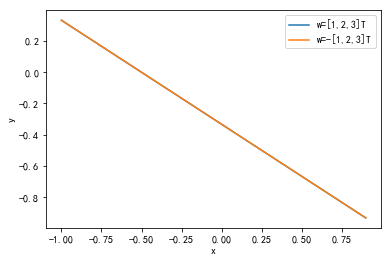

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-1, 1, 0.1)
y1 = np.array([-1/3 - 2/3 * i for i in x])
y2 = np.array([-1/3 - 2/3 * i for i in x])
plt.plot(x, y1, label='w=[1,2,3]T')
plt.plot(x, y2, label='w=-[1,2,3]T')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Problem 1.4 (Page 34)

(a)(b)(c)

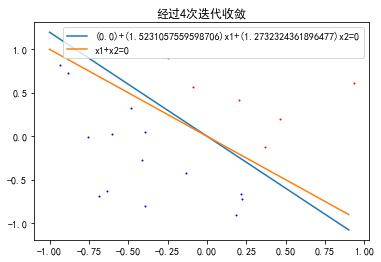

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 12 11:41:30 2019

@author: qinzhen
"""
import helper as hlp
import numpy as np
import matplotlib.pyplot as plt

#设置随机种子，保证每次结果一致
seed = 42
rnd = np.random.RandomState(seed)

#(a)(b)(c)
N = 20
d = 2
a, b, c, X, y, s, w = hlp.f(N, d, rnd)
hlp.plot_helper(a, b, c, X, y, s, w)

(d)

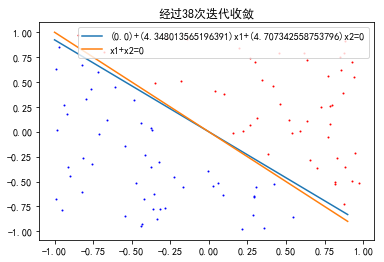

In [5]:
#(d)
N = 100
a, b, c, X, y, s, w = hlp.f(N, d, rnd)
hlp.plot_helper(a, b, c, X, y, s, w)

(e)

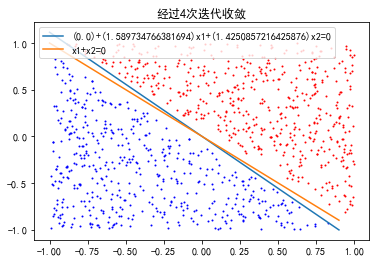

In [6]:
#(e)
N = 1000
a, b, c, X, y, s, w = hlp.f(N, d, rnd)
hlp.plot_helper(a, b, c, X, y, s, w)

(f)

In [7]:
#(f)
#修改数据维度
N = 1000
d = 10
a, b, c, X, y, s, w = hlp.f(N, d, rnd)
print("迭代次数为" + str(s))

迭代次数为430


(g)

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


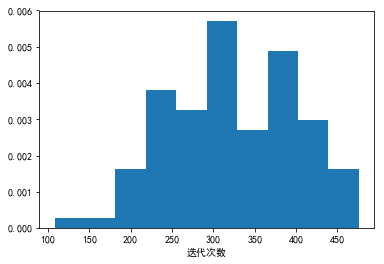

In [8]:
#(g)
res = []
for i in range(100):
    a, b, c, X, y, s, w = hlp.f(N, d, rnd, r=0)
    res.append(s)
plt.hist(res, normed=True)
plt.xlabel("迭代次数")
plt.show()

#### Problem 1.5 (Page 35)

n为1时错误率为0.0


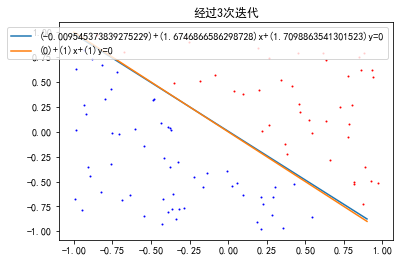

n为0.1时错误率为0.0127


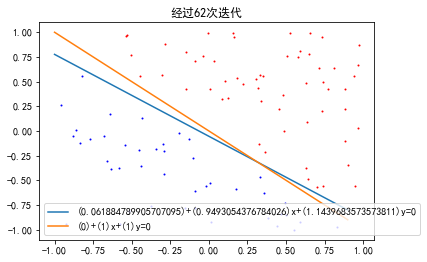

n为0.01时错误率为0.0089


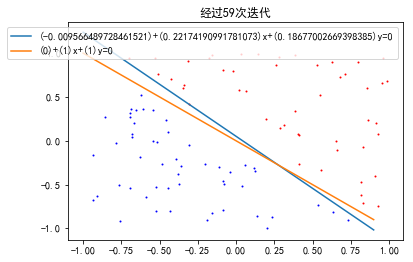

n为0.001时错误率为0.0468


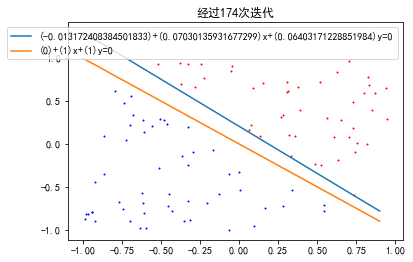

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 12 13:02:55 2019

@author: qinzhen
"""
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def Adaline(n1, n2, d, rnd, eta, w0, iteration=1000):
    """
    生成n1+n2个d维点（不包括偏置项1），n1个点作为训练数据，n2个点作为测试数据，
    x1+...+xd>=t的点标记为+1，x1+...+xd<=-t的点标记为-1，
    w0为分界线的法向量，w0=[0] + [1] * d，这里d = 2
    """
    #生成数据
    X_train, y_train = hlp.data(n1, d, rnd)
    X_test, y_test = hlp.data(n2, d, rnd)
    
    #记录次数
    T = 0
    w = np.zeros(d + 1)
    #print(X_train.dot(w) * y_train)
    while(hlp.Judge(X_train, y_train, w)==False and T < iteration):
        i = np.random.randint(0, n1)
        s = X_train[i, :].dot(w)
        a = s * y_train[i]
        if a <= 1:
            w += eta * (y_train[i] - s) * X_train[i, :]
            T += 1
    
    #计算错误率
    num = np.sum(X_test.dot(w) * y_test <= 0)
    
    print("n为"+str(eta)+"时错误率为"+str(num / n2))
    
    #直线方程为w0+w1*x+w2*y=0,根据此生成点
    X3 = np.arange(-1, 1, 0.1)
    Y3 = np.array([(X3[i]*w[1]+w[0])/(-w[2]) for i in range(len(X3))])

    #目标函数
    X4 = np.arange(-1, 1, 0.1)
    Y4 = np.array([(X3[i]*w0[1]+w0[0])/(-w0[2]) for i in range(len(X4))])

    #画出图片
    plt.scatter(X_train[y_train == 1][:, 1], X_train[y_train == 1][:, 2], c='r', s=1)
    plt.scatter(X_train[y_train == -1][:, 1], X_train[y_train == -1][:, 2], c='b', s=1)
    plt.plot(X3, Y3, label="("+str(w[0])+")+("+str(w[1])+")x+("+str(w[2])+")y=0")
    plt.plot(X4, Y4, label="("+str(w0[0])+")+("+str(w0[1])+")x+("+str(w0[2])+")y=0")
    plt.title(u"经过"+str(T)+u"次迭代")
    #设置坐标范围
    #plt.xticks(np.arange(0,10))
    #plt.yticks(np.arange(0,10))
    plt.legend()
    plt.show()

#设置随机种子，保证每次结果一致
seed = 42
rnd = np.random.RandomState(seed)  
Eta = [1, 0.1, 0.01, 0.001]
for eta in Eta:
    Adaline(100, 10000, 2, rnd, eta, [0, 1, 1])

#### Problem 1.7 (Page 36)

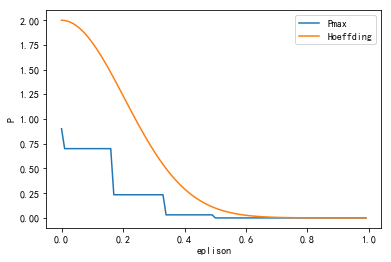

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 12 11:03:25 2019

@author: qinzhen
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def Pmax(N, x, u):
    low = int(3 - 6*x)
    up = int(3 + 6*x)
    s = 0
    for k in range(low, up+1):
        s += comb(N, k) * (u ** k) * ((1 - u) ** (N - k))
    return 1 - s ** 2

x=np.arange(0, 1, 0.01)
y1=np.array([Pmax(6, i, 0.5) for i in x])
y2=np.array([2 * np.exp(-2 * 6 * (i ** 2)) for i in x])

plt.plot(x, y1, label="Pmax")
plt.plot(x, y2, label="Hoeffding")
plt.xlabel("eplison")
plt.ylabel("P")
plt.legend()
plt.show()